In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [30]:

# بحط فيها كل الفانكشنز اللي عايزة أطبقها على الصور وقبل النورماليز لاااااازم تحولها لتنسور
# تطبيق التحسينات على بيانات التدريب
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # تقليب الصورة أفقياً بشكل عشوائي
    transforms.RandomCrop(32, padding=4),  # قص عشوائي مع إضافة حشو
    transforms.RandomRotation(15),  # تدوير الصورة عشوائياً
    transforms.ToTensor(),  # تحويل الصور إلى تنسيق Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# تحويل بيانات الاختبار بدون تحسينات
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# تحميل بيانات تدريب CIFAR-10 مع التحسينات
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)#قوله يطبق الفانكشنز اللي عايزه
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) 

# تحميل بيانات اختبار CIFAR-10 بدون تحسينات
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)# عدد السامبلز فكل باتش


Files already downloaded and verified
Files already downloaded and verified


In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # طبقة التفاف أولى
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # طبقة التفاف ثانية
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # fully connected layer  
        self.fc2 = nn.Linear(512, 10)  # 

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # تطبيق دالة التنشيط ReLU بعد الطبقة الأولى
        x = torch.max_pool2d(x, 2, 2)  # تجميع (Pooling)
        x = torch.relu(self.conv2(x))  # دالة ReLU بعد الطبقة الثانية
        x = torch.max_pool2d(x, 2, 2)  # تجميع (Pooling)
        x = x.view(-1, 64 * 8 * 8)  # تسطيح البيانات
        x = torch.relu(self.fc1(x))  # دالة ReLU بعد الطبقة المتصلة
        x = self.fc2(x)  # طبقة الخرج
        return x

In [12]:
net = Net()
criterion = nn.CrossEntropyLoss()  # دالة فقد التصنيف المتقاطع
optimizer = optim.Adam(net.parameters(), lr=0.001)  # محسن Adam


In [15]:
for epoch in range(10):  # عدد العصور (Epochs)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()  # تصفير التدرجات
        outputs = net(inputs)  # التمرير الأمامي
        loss = criterion(outputs, labels)  # حساب الفقد
        loss.backward()  # التمرير الخلفي
        optimizer.step()  # تحديث الأوزان
        running_loss += loss.item()
        if i % 100 == 99:  # طباعة كل 100 دفعة
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("التدريب انتهى!")



[1, 100] loss: 1.940
[1, 200] loss: 1.647
[1, 300] loss: 1.532
[1, 400] loss: 1.511
[1, 500] loss: 1.456
[1, 600] loss: 1.408
[1, 700] loss: 1.373
[2, 100] loss: 1.296
[2, 200] loss: 1.288
[2, 300] loss: 1.244
[2, 400] loss: 1.243
[2, 500] loss: 1.211
[2, 600] loss: 1.182
[2, 700] loss: 1.183
[3, 100] loss: 1.117
[3, 200] loss: 1.130
[3, 300] loss: 1.114
[3, 400] loss: 1.096
[3, 500] loss: 1.089
[3, 600] loss: 1.100
[3, 700] loss: 1.070
[4, 100] loss: 1.056
[4, 200] loss: 1.024
[4, 300] loss: 1.036
[4, 400] loss: 1.023
[4, 500] loss: 1.009
[4, 600] loss: 0.988
[4, 700] loss: 0.996
[5, 100] loss: 0.986
[5, 200] loss: 0.975
[5, 300] loss: 0.942
[5, 400] loss: 0.969
[5, 500] loss: 0.963
[5, 600] loss: 0.958
[5, 700] loss: 0.928
[6, 100] loss: 0.930
[6, 200] loss: 0.920
[6, 300] loss: 0.918
[6, 400] loss: 0.889
[6, 500] loss: 0.924
[6, 600] loss: 0.913
[6, 700] loss: 0.927
[7, 100] loss: 0.892
[7, 200] loss: 0.881
[7, 300] loss: 0.861
[7, 400] loss: 0.894
[7, 500] loss: 0.876
[7, 600] loss

In [16]:
# اختبار النموذج
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"دقة النموذج على بيانات الاختبار: {100 * correct / total:.2f}%")

دقة النموذج على بيانات الاختبار: 75.58%


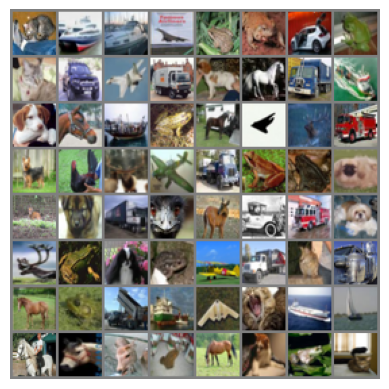

cat ship ship airplane


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# دالة لعرض الصور
def imshow(img):
    # إعادة تطبيع الصورة من النطاق [-1, 1] إلى [0, 1]
    img = img / 2 + 0.5
    npimg = img.numpy()  # تحويل الصورة إلى مصفوفة Numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # تغيير الأبعاد لتناسب matplotlib
    plt.axis('off')  # إزالة المحاور لتحسين العرض
    plt.show()

# الحصول على بعض البيانات من testloader
dataiter = iter(testloader)
images, labels = next(dataiter)

# عرض شبكة من الصور باستخدام make_grid
imshow(torchvision.utils.make_grid(images))

# تحويل التسميات إلى أسماء الفئات
classes = trainset.classes  # الحصول على أسماء الفئات من مجموعة البيانات
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))  # عرض أسماء الفئات لأول 4 صور


In [9]:
#import torchinfo  # استيراد مكتبة torchinfo

# تحديد الجهاز (CPU أو GPU)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# إنشاء النموذج ونقله إلى الجهاز
#model = Net().to(device)

# عرض ملخص النموذج باستخدام torchinfo
#summary = torchinfo.summary(model, input_size=(64, 3, 32, 32))  # 64 هو حجم الدفعة، 3 قنوات (RGB)، وحجم الصورة 32x32
#print(summary)


ModuleNotFoundError: No module named 'torchinfo'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define data transformations with enhanced augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomCrop(size=32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Load data using DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)  # Increased batch size
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Define EnhancedNet model with increased complexity
class EnhancedNet(nn.Module):
    def __init__(self):
        super(EnhancedNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)  # Increased filters
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)  # Increased filters
        self.bn2 = nn.BatchNorm2d(128)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize the model
model = EnhancedNet()

# Choose device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer with L2 regularization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # Smaller learning rate

# Use Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Train the model
for epoch in range(40):  # Increased epochs
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    scheduler.step()  # Update learning rate

print("Training finished!")

# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test data: {100 * correct / total:.2f}%")

# Save the trained model
torch.save(model.state_dict(), 'enhanced_model.pth')
print("Model saved as 'enhanced_model.pth'")


Files already downloaded and verified
Files already downloaded and verified
[1, 100] loss: 1.992
[1, 200] loss: 1.791
[1, 300] loss: 1.698
[2, 100] loss: 1.599
[2, 200] loss: 1.553
[2, 300] loss: 1.517
[3, 100] loss: 1.465
[3, 200] loss: 1.458
[3, 300] loss: 1.419
[4, 100] loss: 1.375
[4, 200] loss: 1.381
[4, 300] loss: 1.346
[5, 100] loss: 1.318
[5, 200] loss: 1.319
[5, 300] loss: 1.299
[6, 100] loss: 1.254
[6, 200] loss: 1.238
[6, 300] loss: 1.234
[7, 100] loss: 1.226
[7, 200] loss: 1.235
[7, 300] loss: 1.219
[8, 100] loss: 1.209
[8, 200] loss: 1.235
[8, 300] loss: 1.215
[9, 100] loss: 1.196
[9, 200] loss: 1.201
[9, 300] loss: 1.217
[10, 100] loss: 1.202
[10, 200] loss: 1.209
[10, 300] loss: 1.211
[11, 100] loss: 1.204
[11, 200] loss: 1.193
[11, 300] loss: 1.204
[12, 100] loss: 1.189
[12, 200] loss: 1.186
[12, 300] loss: 1.197
[13, 100] loss: 1.192
[13, 200] loss: 1.210
[13, 300] loss: 1.182
[14, 100] loss: 1.201
[14, 200] loss: 1.189
[14, 300] loss: 1.192
[15, 100] loss: 1.200
[15, 

In [5]:
# Save the trained model
torch.save(model.state_dict(), 'enhanced_model.pth')
print("Model saved as 'enhanced_model.pth'")

Model saved as 'enhanced_model.pth'


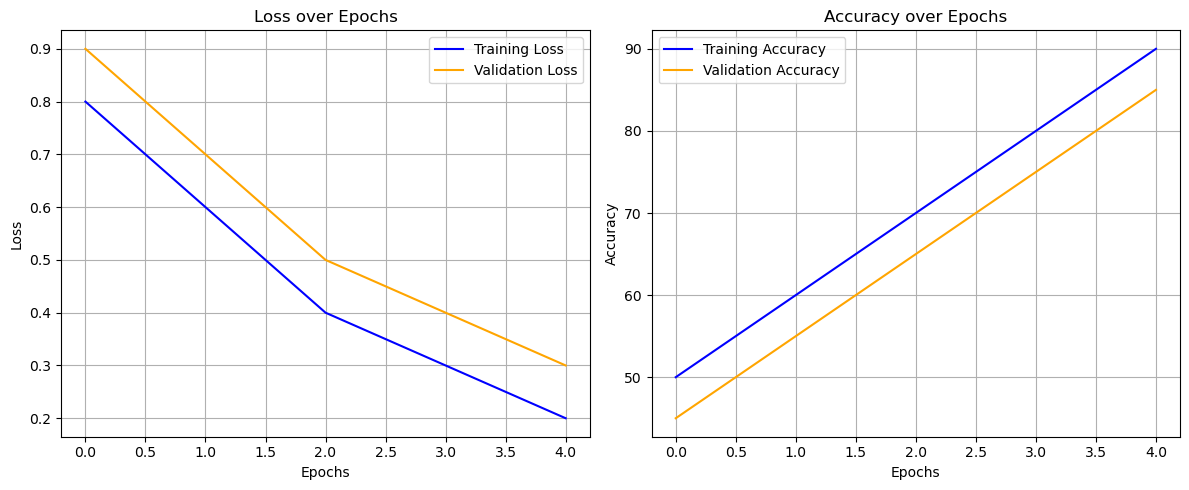

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

# دالة لرسم الأداء
def plot_performance(train_losses, val_losses, train_acc, val_acc):
    """
    ترسم أداء التدريب والتحقق عبر العصور.
    
    Args:
        train_losses (list): قائمة بخسائر التدريب لكل عصر.
        val_losses (list): قائمة بخسائر التحقق لكل عصر.
        train_acc (list): قائمة بدقة التدريب لكل عصر.
        val_acc (list): قائمة بدقة التحقق لكل عصر.
    """
    plt.figure(figsize=(12, 5))

    # رسم الخسائر
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.grid(True)

    # رسم الدقة
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy', color='blue')
    plt.plot(val_acc, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()
    plt.grid(True)

    # استخدام plt.show() لعرض الرسوم البيانية
    plt.tight_layout()
    plt.show()

plot_performance(train_losses, val_losses, train_acc, val_acc)



In [6]:
from flask import Flask, request, render_template_string
from werkzeug.utils import secure_filename
import os
import torch
from torchvision import transforms
from PIL import Image

# Define the Flask application
app = Flask(__name__)

# Setup upload folder
UPLOAD_FOLDER = './uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Define the model (replace this with your actual model definition)
class EnhancedNet(torch.nn.Module):
    def __init__(self):
        super(EnhancedNet, self).__init__()
        # Define layers (update this with the actual model structure)
        self.fc = torch.nn.Linear(32 * 32 * 3, 10)  # Dummy example

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.fc(x)

# Load the trained model
model = EnhancedNet()
try:
    model.load_state_dict(torch.load('enhanced_model.pth', map_location=torch.device('cpu')))
    model.eval()
except FileNotFoundError:
    print("Model file 'enhanced_model.pth' not found. Ensure it's in the correct directory.")
    exit(1)

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define the classes (update this to match your model's output)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# HTML for the main page
INDEX_HTML = '''
<!doctype html>
<title>تطبيق تصنيف الصور</title>
<h1>قم برفع صورة لتصنيفها</h1>
<form method="post" action="/predict" enctype="multipart/form-data">
  <input type="file" name="file" required>
  <br><br>
  <input type="submit" value="رفع الصورة">
</form>
'''

@app.route('/')
def index():
    return render_template_string(INDEX_HTML)

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return 'لم يتم اختيار أي ملف', 400
    file = request.files['file']
    if file.filename == '':
        return 'اسم الملف فارغ', 400
    if file:
        filename = secure_filename(file.filename)
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(filepath)
        
        # Process the image
        try:
            image = Image.open(filepath).convert('RGB')
        except Exception as e:
            return f'خطأ في قراءة الصورة: {str(e)}', 400

        image = transform(image).unsqueeze(0)

        # Perform prediction
        with torch.no_grad():
            outputs = model(image)
            _, predicted = torch.max(outputs, 1)
            category = classes[predicted.item()]
        
        return f'تم تصنيف الصورة على أنها: <strong>{category}</strong>'
    else:
        return 'حدث خطأ أثناء تحميل الملف', 500

if __name__ == '__main__':
    app.run(debug=True, port=5000)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [3]:
""""# إعداد Flask
app = Flask(__name__)
app.config['UPLOADED_PHOTOS_DEST'] = 'uploads'
photos = UploadSet('photos', IMAGES)
configure_uploads(app, photos)

# تحميل النموذج المدرب
model = EnhancedNet()
model.load_state_dict(torch.load('model/enhanced_model.pth'))
model.eval()  # تعيين النموذج لوضع التقييم

# إعداد التحويلات للصور المدخلة
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# واجهة تحميل الصورة
@app.route('/', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST' and 'photo' in request.files:
        photo = request.files['photo']
        if photo:
            filename = photos.save(photo)
            image_path = os.path.join(app.config['UPLOADED_PHOTOS_DEST'], filename)
            result = classify_image(image_path)
            return f"نتيجة التصنيف: {result}"
    return render_template('upload.html')

def classify_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # إضافة بعد الدفعة
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()  # استرجاع الرقم المتوقع

if __name__ == '__main__':
    app.run(debug=True)

NameError: name 'UploadSet' is not defined